<a href="https://colab.research.google.com/github/piklu007mallick/project_flight_transportation/blob/main/Coding_flight_networks_airportwise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import numpy and pandas packages

In [ ]:
import pandas as pd
import numpy as np

file =('/content/drive/MyDrive/M.Tech_main Project work/flight.xlsx')
## Removing Unnecessary Rows and Colums from the Excel Sheet
flightData = pd.read_excel(file, usecols="C,D,E", skiprows=0)
print(flightData)

    Airport Names Airport(Arrival)  Frequency per week
0        Agartala        Bangalore                   7
1             NaN            Delhi                   7
2             NaN         Guwahati                  25
3             NaN           Imphal                   7
4             NaN          Kolkata                  77
..            ...              ...                 ...
875        Thoise            Delhi                   2
876     Passighat         Guwahati                   4
877       Pakyong          Kolkata                   7
878   Pondicherry        Bangalore                   5
879           NaN        Hyderabad                   7

[880 rows x 3 columns]


In [ ]:
## Using PAD Fill to Fill Up the Empty Columns in City Name
flightData.fillna(method='pad', inplace=True)
print(flightData.to_string())

     Airport Names Airport(Arrival)  Frequency per week
0         Agartala        Bangalore                   7
1         Agartala            Delhi                   7
2         Agartala         Guwahati                  25
3         Agartala           Imphal                   7
4         Agartala          Kolkata                  77
5           Agatti           Cochin                  14
6        Ahmedabad       Aurangabad                  13
7        Ahmedabad         Bagdogra                  13
8        Ahmedabad        Bangalore                  76
9        Ahmedabad          Belgaum                   7
10       Ahmedabad        Bhavnagar                   6
11       Ahmedabad           Bhopal                  14
12       Ahmedabad     Bhubaneshwar                   7
13       Ahmedabad       Chandigarh                  27
14       Ahmedabad          Chennai                  55
15       Ahmedabad           Cochin                  14
16       Ahmedabad         Dehradun             

In [ ]:
## Converting the city names to index based on dictionary

cityDict = { "Delhi" : 0, "Mumbai" : 1, "Kolkata" : 2, "Chennai" : 3, "Agartala" : 4, "Agatti" : 5, "Ahmedabad" : 6, "Bhavnagar" : 7, "Porbandar" : 8, "Jammnagar" : 9, "Rajkot" : 10, "Bhuj" : 11, "Kandla" : 12, "Surat" : 13, "Vadodara" : 14, "Aizawal" : 15, "Agra" : 16, "Allahabad" : 17, "Gorakhpur" : 18, "Hindon" : 19, "Kanpur" : 20, "Lucknow" : 21, "Varanashi" : 22, "Adampur" : 23, "Amritsar" : 24, "Bathinda" : 25, "Chandigarh" : 26, "Bagdogra" : 27, "Durgapur" : 28, "Bangalore" : 29, "Belgaum" : 30, "Hubli" : 31, "Mangalore" : 32, "Vidyanagar" : 33, "Mysore" : 34, "Bhopal" : 35, "Gwalior" : 36, "Indore" : 37, "Khajuraho" : 38, "Jabalpur" : 39, "Bhubaneshwar" : 40, "Jharsuguda" : 41, "Calicut" : 42, "Cochin" : 43, "Kannur" : 44, "Trivandrum" : 45, "Coimbatore" : 46, "Madurai" : 47, "Trichy" : 48, "Tuticorin" : 49, "Salem" : 50, "Dehradun" : 51, "Pantnagar" : 52, "Pithoragarh" : 53, "Dibrugarh" : 54, "Guwahati" : 55, "Jorhat" : 56, "Silchar" : 57, "Tezpur" : 58, "Lilabari" : 59, "Dimapur" : 60, "Gaya" : 61, "Patna" : 62, "Goa" : 63, "Hyderabad" : 64, "Imphal" : 65, "Bikaner" : 66, "Jaipur" : 67, "Jaisalmer" : 68, "Jodhpur" : 69, "Kishangarh" : 70, "Udaipur" : 71, "Jammu" : 72, "Srinagar" : 73, "Aurangabad" : 74, "Kolhapur" : 75, "Nagpur" : 76, "Pune" : 77, "Shirdi" : 78, "Nashik" : 79, "Nanded" : 80, "Jalgaon" : 81, "Port Blair" : 82, "Jagdalpur" : 83, "Raipur" : 84, "Cuddapah" : 85, "Rajahmundry" : 86, "Tirupathi" : 87, "Vijaywada" : 88, "Visakhapatnam" : 89, "Ranchi" : 90, "Shillong" : 91, "Dharamshala" : 92, "Kullu" : 93, "Shimla" : 94, "Diu" : 95, "Leh" : 96, "Thoise" : 97, "Passighat" : 98, "Pakyong" : 99, "Pondicherry" : 100, "Belagavi" : 101, "Kadapa" : 102, "Andal" : 103, "Ludhiana" : 104, "Pathankot" : 105, "Patnagar" : 106, "Kangra" : 107, "Meerut" : 108, "Bidar" :109, }
inv_cityDict = {v: k for k, v in cityDict.items()}
print(inv_cityDict)
print(len(cityDict))

{0: 'Delhi', 1: 'Mumbai', 2: 'Kolkata', 3: 'Chennai', 4: 'Agartala', 5: 'Agatti', 6: 'Ahmedabad', 7: 'Bhavnagar', 8: 'Porbandar', 9: 'Jammnagar', 10: 'Rajkot', 11: 'Bhuj', 12: 'Kandla', 13: 'Surat', 14: 'Vadodara', 15: 'Aizawal', 16: 'Agra', 17: 'Allahabad', 18: 'Gorakhpur', 19: 'Hindon', 20: 'Kanpur', 21: 'Lucknow', 22: 'Varanashi', 23: 'Adampur', 24: 'Amritsar', 25: 'Bathinda', 26: 'Chandigarh', 27: 'Bagdogra', 28: 'Durgapur', 29: 'Bangalore', 30: 'Belgaum', 31: 'Hubli', 32: 'Mangalore', 33: 'Vidyanagar', 34: 'Mysore', 35: 'Bhopal', 36: 'Gwalior', 37: 'Indore', 38: 'Khajuraho', 39: 'Jabalpur', 40: 'Bhubaneshwar', 41: 'Jharsuguda', 42: 'Calicut', 43: 'Cochin', 44: 'Kannur', 45: 'Trivandrum', 46: 'Coimbatore', 47: 'Madurai', 48: 'Trichy', 49: 'Tuticorin', 50: 'Salem', 51: 'Dehradun', 52: 'Pantnagar', 53: 'Pithoragarh', 54: 'Dibrugarh', 55: 'Guwahati', 56: 'Jorhat', 57: 'Silchar', 58: 'Tezpur', 59: 'Lilabari', 60: 'Dimapur', 61: 'Gaya', 62: 'Patna', 63: 'Goa', 64: 'Hyderabad', 65: 'Imph

In [ ]:
## Replacing the Names with Indices using Dictionary
flightData.replace(cityDict, inplace=True)
print(flightData.to_string())

     Airport Names  Airport(Arrival)  Frequency per week
0                4                29                   7
1                4                 0                   7
2                4                55                  25
3                4                65                   7
4                4                 2                  77
5                5                43                  14
6                6                74                  13
7                6                27                  13
8                6                29                  76
9                6                30                   7
10               6                 7                   6
11               6                35                  14
12               6                40                   7
13               6                26                  27
14               6                 3                  55
15               6                43                  14
16               6             

In [ ]:
## Creating the Matrix with Zero Values
## len function is used to calculate the length of the dictionary
cityArray = np.zeros((len(cityDict), len(cityDict)))
print(cityArray)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
## Iterating the DataFrame to insert value at the adjacency matrix
for i in range(len(flightData)) :

    print(flightData.iloc[i, 0], flightData.iloc[i, 1], flightData.iloc[i, 2])
    cityArray[int(flightData.iloc[i, 0]), int(flightData.iloc[i, 1])] = int(flightData.iloc[i, 2])

4 29 7
4 0 7
4 55 25
4 65 7
4 2 77
5 43 14
6 74 13
6 27 13
6 29 76
6 30 7
6 7 6
6 35 14
6 40 7
6 26 27
6 3 55
6 43 14
6 51 13
6 0 172
6 95 6
6 63 27
6 55 6
6 31 7
6 64 59
6 37 40
6 39 6
6 67 39
6 68 12
6 81 7
6 69 13
6 12 13
6 20 6
6 70 6
6 2 29
6 21 29
6 108 6
6 1 88
6 76 13
6 79 13
6 62 6
6 8 7
6 77 41
6 73 7
6 71 6
6 22 20
7 6 6
7 13 6
8 6 7
8 1 7
9 1 7
10 0 14
10 1 21
11 1 7
12 6 12
12 1 7
13 29 14
13 7 6
13 3 14
13 0 42
13 63 21
13 64 14
13 67 10
13 68 7
13 2 28
13 1 7
13 76 7
13 71 7
14 29 15
14 0 49
14 64 7
14 1 22
14 76 14
15 55 14
15 65 4
15 2 21
16 67 4
17 35 7
17 29 7
17 0 28
17 2 21
17 1 7
17 84 21
18 29 7
18 0 14
18 64 7
18 2 7
18 1 7
19 31 3
19 53 7
20 6 6
20 0 7
20 1 14
21 6 36
21 29 41
21 3 7
21 51 6
21 0 147
21 63 8
21 64 20
21 2 28
21 1 63
21 62 14
21 77 7
21 73 7
22 6 19
22 6 13
22 29 27
22 40 7
22 3 18
22 51 3
22 0 127
22 61 15
22 64 36
22 67 11
22 38 12
22 2 33
22 1 56
23 0 7
24 29 7
24 51 2
24 0 87
24 64 7
24 67 7
24 2 7
24 1 16
24 62 11
24 73 14
25 0 3
26 6 23
26

In [ ]:
## tolist function converts the values to Float values. Hence specifying the type explicitly 
#print(np.matrix(cityArray.astype(np.int32).tolist()))
output_df = pd.DataFrame(cityArray)
output_df.rename(index=dict(inv_cityDict), columns=dict(inv_cityDict), inplace=True)

In [ ]:
## Adjacency matrix for a week (7 days)

output_df

,Delhi,Mumbai,Kolkata,Chennai,Agartala,Agatti,Ahmedabad,Bhavnagar,Porbandar,Jammnagar,Rajkot,Bhuj,Kandla,Surat,Vadodara,Aizawal,Agra,Allahabad,Gorakhpur,Hindon,Kanpur,Lucknow,Varanashi,Adampur,Amritsar,Bathinda,Chandigarh,Bagdogra,Durgapur,Bangalore,Belgaum,Hubli,Mangalore,Vidyanagar,Mysore,Bhopal,Gwalior,Indore,Khajuraho,Jabalpur,...,Kishangarh,Udaipur,Jammu,Srinagar,Aurangabad,Kolhapur,Nagpur,Pune,Shirdi,Nashik,Nanded,Jalgaon,Port Blair,Jagdalpur,Raipur,Cuddapah,Rajahmundry,Tirupathi,Vijaywada,Visakhapatnam,Ranchi,Shillong,Dharamshala,Kullu,Shimla,Diu,Leh,Thoise,Passighat,Pakyong,Pondicherry,Belagavi,Kadapa,Andal,Ludhiana,Pathankot,Patnagar,Kangra,Meerut,Bidar
Delhi,0.0,328.0,142.0,77.0,0.0,0.0,74.0,0.0,0.0,0.0,15.0,0.0,0.0,29.0,14.0,0.0,0.0,21.0,14.0,0.0,7.0,77.0,70.0,7.0,39.0,3.0,80.0,48.0,0.0,191.0,0.0,0.0,7.0,0.0,0.0,34.0,3.0,46.0,0.0,14.0,...,7.0,14.0,50.0,74.0,14.0,0.0,42.0,107.0,14.0,0.0,0.0,0.0,3.0,0.0,14.0,0.0,0.0,0.0,14.0,34.0,70.0,0.0,8.0,21.0,7.0,0.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0,4.0,6.0,0.0,0.0
Mumbai,457.0,0.0,178.0,154.0,0.0,0.0,90.0,7.0,7.0,7.0,18.0,7.0,7.0,7.0,21.0,0.0,0.0,7.0,7.0,0.0,28.0,49.0,43.0,0.0,19.0,0.0,56.0,21.0,0.0,261.0,4.0,5.0,28.0,0.0,0.0,28.0,0.0,38.0,0.0,7.0,...,0.0,35.0,0.0,107.0,10.0,5.0,58.0,0.0,7.0,0.0,7.0,5.0,7.0,0.0,14.0,0.0,0.0,0.0,0.0,12.0,29.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Kolkata,278.0,169.0,0.0,120.0,78.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,14.0,0.0,21.0,7.0,0.0,0.0,30.0,33.0,0.0,7.0,0.0,14.0,66.0,0.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,34.0,0.0,0.0,0.0,0.0,61.0,0.0,50.0,0.0,0.0,0.0,0.0,14.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chennai,170.0,157.0,102.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,18.0,0.0,0.0,0.0,0.0,7.0,0.0,154.0,0.0,7.0,14.0,0.0,14.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,49.0,14.0,0.0,0.0,0.0,69.0,0.0,7.0,7.0,7.0,0.0,17.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Agartala,7.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pathankot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Patnagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kangra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Meerut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
p=output_df

In [ ]:
## Creating 110 adjacency matrix for entire duration ( 27th October 2019 to 28th March 2020)

n = 22  ## n=22 weeks or 152 days
output_df=np.multiply(p,n)
output_df

,Delhi,Mumbai,Kolkata,Chennai,Agartala,Agatti,Ahmedabad,Bhavnagar,Porbandar,Jammnagar,Rajkot,Bhuj,Kandla,Surat,Vadodara,Aizawal,Agra,Allahabad,Gorakhpur,Hindon,Kanpur,Lucknow,Varanashi,Adampur,Amritsar,Bathinda,Chandigarh,Bagdogra,Durgapur,Bangalore,Belgaum,Hubli,Mangalore,Vidyanagar,Mysore,Bhopal,Gwalior,Indore,Khajuraho,Jabalpur,...,Kishangarh,Udaipur,Jammu,Srinagar,Aurangabad,Kolhapur,Nagpur,Pune,Shirdi,Nashik,Nanded,Jalgaon,Port Blair,Jagdalpur,Raipur,Cuddapah,Rajahmundry,Tirupathi,Vijaywada,Visakhapatnam,Ranchi,Shillong,Dharamshala,Kullu,Shimla,Diu,Leh,Thoise,Passighat,Pakyong,Pondicherry,Belagavi,Kadapa,Andal,Ludhiana,Pathankot,Patnagar,Kangra,Meerut,Bidar
Delhi,0.0,7216.0,3124.0,1694.0,0.0,0.0,1628.0,0.0,0.0,0.0,330.0,0.0,0.0,638.0,308.0,0.0,0.0,462.0,308.0,0.0,154.0,1694.0,1540.0,154.0,858.0,66.0,1760.0,1056.0,0.0,4202.0,0.0,0.0,154.0,0.0,0.0,748.0,66.0,1012.0,0.0,308.0,...,154.0,308.0,1100.0,1628.0,308.0,0.0,924.0,2354.0,308.0,0.0,0.0,0.0,66.0,0.0,308.0,0.0,0.0,0.0,308.0,748.0,1540.0,0.0,176.0,462.0,154.0,0.0,638.0,44.0,0.0,0.0,0.0,0.0,0.0,154.0,88.0,66.0,88.0,132.0,0.0,0.0
Mumbai,10054.0,0.0,3916.0,3388.0,0.0,0.0,1980.0,154.0,154.0,154.0,396.0,154.0,154.0,154.0,462.0,0.0,0.0,154.0,154.0,0.0,616.0,1078.0,946.0,0.0,418.0,0.0,1232.0,462.0,0.0,5742.0,88.0,110.0,616.0,0.0,0.0,616.0,0.0,836.0,0.0,154.0,...,0.0,770.0,0.0,2354.0,220.0,110.0,1276.0,0.0,154.0,0.0,154.0,110.0,154.0,0.0,308.0,0.0,0.0,0.0,0.0,264.0,638.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0
Kolkata,6116.0,3718.0,0.0,2640.0,1716.0,0.0,770.0,0.0,0.0,0.0,0.0,0.0,0.0,484.0,0.0,308.0,0.0,462.0,154.0,0.0,0.0,660.0,726.0,0.0,154.0,0.0,308.0,1452.0,0.0,3124.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,154.0,0.0,770.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,748.0,0.0,0.0,0.0,0.0,1342.0,0.0,1100.0,0.0,0.0,0.0,0.0,308.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chennai,3740.0,3454.0,2244.0,0.0,0.0,0.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,396.0,0.0,0.0,0.0,0.0,154.0,0.0,3388.0,0.0,154.0,308.0,0.0,308.0,0.0,0.0,176.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,154.0,1078.0,308.0,0.0,0.0,0.0,1518.0,0.0,154.0,154.0,154.0,0.0,374.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0
Agartala,154.0,0.0,1694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pathankot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Patnagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kangra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Meerut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
## Exporting this output adjacency matrix data for this entire duration (27th October to 28th March = 152 days) into excel sheet

filepath = 'Output_adjacency_matrix_entire_duration.xlsx'
output_df.to_excel(filepath, index=True)

In [ ]:
## Normalizing the adjacency matrix

df=output_df.to_numpy()
dfmax, dfmin = df.max(), df.min()
df = (df - dfmin)/(dfmax - dfmin)
# Create the dataframe
output_df=pd.DataFrame(df)
output_df.rename(index=dict(inv_cityDict), columns=dict(inv_cityDict), inplace=True)

In [ ]:
## Normalized adjacency matrix

output_df

,Delhi,Mumbai,Kolkata,Chennai,Agartala,Agatti,Ahmedabad,Bhavnagar,Porbandar,Jammnagar,Rajkot,Bhuj,Kandla,Surat,Vadodara,Aizawal,Agra,Allahabad,Gorakhpur,Hindon,Kanpur,Lucknow,Varanashi,Adampur,Amritsar,Bathinda,Chandigarh,Bagdogra,Durgapur,Bangalore,Belgaum,Hubli,Mangalore,Vidyanagar,Mysore,Bhopal,Gwalior,Indore,Khajuraho,Jabalpur,...,Kishangarh,Udaipur,Jammu,Srinagar,Aurangabad,Kolhapur,Nagpur,Pune,Shirdi,Nashik,Nanded,Jalgaon,Port Blair,Jagdalpur,Raipur,Cuddapah,Rajahmundry,Tirupathi,Vijaywada,Visakhapatnam,Ranchi,Shillong,Dharamshala,Kullu,Shimla,Diu,Leh,Thoise,Passighat,Pakyong,Pondicherry,Belagavi,Kadapa,Andal,Ludhiana,Pathankot,Patnagar,Kangra,Meerut,Bidar
Delhi,0.000000,0.717724,0.310722,0.168490,0.000000,0.0,0.161926,0.000000,0.000000,0.000000,0.032823,0.000000,0.000000,0.063457,0.030635,0.000000,0.0,0.045952,0.030635,0.0,0.015317,0.168490,0.153173,0.015317,0.085339,0.006565,0.175055,0.105033,0.0,0.417943,0.000000,0.000000,0.015317,0.0,0.000000,0.074398,0.006565,0.100656,0.0,0.030635,...,0.015317,0.030635,0.109409,0.161926,0.030635,0.000000,0.091904,0.234136,0.030635,0.0,0.000000,0.000000,0.006565,0.0,0.030635,0.000000,0.000000,0.0,0.030635,0.074398,0.153173,0.000000,0.017505,0.045952,0.015317,0.000000,0.063457,0.004376,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.008753,0.006565,0.008753,0.013129,0.0,0.0
Mumbai,1.000000,0.000000,0.389497,0.336980,0.000000,0.0,0.196937,0.015317,0.015317,0.015317,0.039387,0.015317,0.015317,0.015317,0.045952,0.000000,0.0,0.015317,0.015317,0.0,0.061269,0.107221,0.094092,0.000000,0.041575,0.000000,0.122538,0.045952,0.0,0.571116,0.008753,0.010941,0.061269,0.0,0.000000,0.061269,0.000000,0.083151,0.0,0.015317,...,0.000000,0.076586,0.000000,0.234136,0.021882,0.010941,0.126915,0.000000,0.015317,0.0,0.015317,0.010941,0.015317,0.0,0.030635,0.000000,0.000000,0.0,0.000000,0.026258,0.063457,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.0,0.015317,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Kolkata,0.608315,0.369803,0.000000,0.262582,0.170678,0.0,0.076586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048140,0.000000,0.030635,0.0,0.045952,0.015317,0.0,0.000000,0.065646,0.072210,0.000000,0.015317,0.000000,0.030635,0.144420,0.0,0.310722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.015317,0.015317,0.0,0.076586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032823,0.074398,0.000000,0.0,0.000000,0.000000,0.133479,0.0,0.109409,0.000000,0.000000,0.0,0.000000,0.030635,0.000000,0.015317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Chennai,0.371991,0.343545,0.223195,0.000000,0.000000,0.0,0.164114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.017505,0.039387,0.000000,0.000000,0.000000,0.000000,0.015317,0.0,0.336980,0.000000,0.015317,0.030635,0.0,0.030635,0.000000,0.000000,0.017505,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.107221,0.030635,0.0,0.000000,0.000000,0.150985,0.0,0.015317,0.015317,0.015317,0.0,0.037199,0.059081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Agartala,0.015317,0.000000,0.168490,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,.

In [ ]:
## Exporting this normalized adjacency matrix into excel sheet

filepath = 'Normalized_adjacency_matrix.xlsx'
output_df.to_excel(filepath, index=True)

In [ ]:
## Formation of network graphs from this normalized adjacency matrix 

import networkx as nx
#convert dataframe to numpy array
x=output_df.to_numpy()

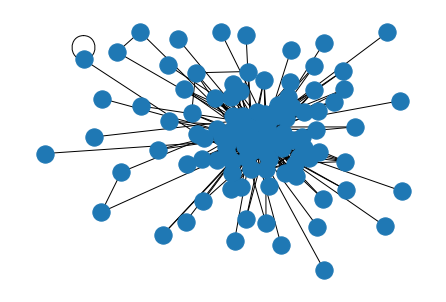

In [ ]:
## Representing adjacency matrix in form of network graphs

H=nx.from_numpy_matrix(x)
nx.draw(H)

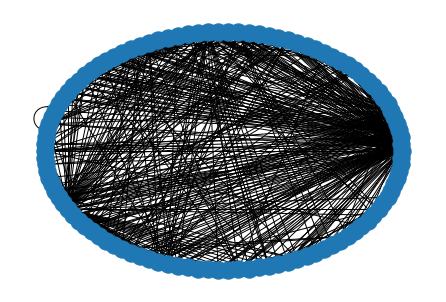

In [ ]:
# Representing this network graphs in circular form
nx.draw_circular(H)

In [ ]:
output_df

,Delhi,Mumbai,Kolkata,Chennai,Agartala,Agatti,Ahmedabad,Bhavnagar,Porbandar,Jammnagar,Rajkot,Bhuj,Kandla,Surat,Vadodara,Aizawal,Agra,Allahabad,Gorakhpur,Hindon,Kanpur,Lucknow,Varanashi,Adampur,Amritsar,Bathinda,Chandigarh,Bagdogra,Durgapur,Bangalore,Belgaum,Hubli,Mangalore,Vidyanagar,Mysore,Bhopal,Gwalior,Indore,Khajuraho,Jabalpur,...,Kishangarh,Udaipur,Jammu,Srinagar,Aurangabad,Kolhapur,Nagpur,Pune,Shirdi,Nashik,Nanded,Jalgaon,Port Blair,Jagdalpur,Raipur,Cuddapah,Rajahmundry,Tirupathi,Vijaywada,Visakhapatnam,Ranchi,Shillong,Dharamshala,Kullu,Shimla,Diu,Leh,Thoise,Passighat,Pakyong,Pondicherry,Belagavi,Kadapa,Andal,Ludhiana,Pathankot,Patnagar,Kangra,Meerut,Bidar
Delhi,0.000000,0.717724,0.310722,0.168490,0.000000,0.0,0.161926,0.000000,0.000000,0.000000,0.032823,0.000000,0.000000,0.063457,0.030635,0.000000,0.0,0.045952,0.030635,0.0,0.015317,0.168490,0.153173,0.015317,0.085339,0.006565,0.175055,0.105033,0.0,0.417943,0.000000,0.000000,0.015317,0.0,0.000000,0.074398,0.006565,0.100656,0.0,0.030635,...,0.015317,0.030635,0.109409,0.161926,0.030635,0.000000,0.091904,0.234136,0.030635,0.0,0.000000,0.000000,0.006565,0.0,0.030635,0.000000,0.000000,0.0,0.030635,0.074398,0.153173,0.000000,0.017505,0.045952,0.015317,0.000000,0.063457,0.004376,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.008753,0.006565,0.008753,0.013129,0.0,0.0
Mumbai,1.000000,0.000000,0.389497,0.336980,0.000000,0.0,0.196937,0.015317,0.015317,0.015317,0.039387,0.015317,0.015317,0.015317,0.045952,0.000000,0.0,0.015317,0.015317,0.0,0.061269,0.107221,0.094092,0.000000,0.041575,0.000000,0.122538,0.045952,0.0,0.571116,0.008753,0.010941,0.061269,0.0,0.000000,0.061269,0.000000,0.083151,0.0,0.015317,...,0.000000,0.076586,0.000000,0.234136,0.021882,0.010941,0.126915,0.000000,0.015317,0.0,0.015317,0.010941,0.015317,0.0,0.030635,0.000000,0.000000,0.0,0.000000,0.026258,0.063457,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.0,0.015317,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Kolkata,0.608315,0.369803,0.000000,0.262582,0.170678,0.0,0.076586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048140,0.000000,0.030635,0.0,0.045952,0.015317,0.0,0.000000,0.065646,0.072210,0.000000,0.015317,0.000000,0.030635,0.144420,0.0,0.310722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.015317,0.015317,0.0,0.076586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032823,0.074398,0.000000,0.0,0.000000,0.000000,0.133479,0.0,0.109409,0.000000,0.000000,0.0,0.000000,0.030635,0.000000,0.015317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Chennai,0.371991,0.343545,0.223195,0.000000,0.000000,0.0,0.164114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.017505,0.039387,0.000000,0.000000,0.000000,0.000000,0.015317,0.0,0.336980,0.000000,0.015317,0.030635,0.0,0.030635,0.000000,0.000000,0.017505,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.107221,0.030635,0.0,0.000000,0.000000,0.150985,0.0,0.015317,0.015317,0.015317,0.0,0.037199,0.059081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Agartala,0.015317,0.000000,0.168490,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,.

In [ ]:
## Calculating the row wise summation

A=output_df

A["sum"] = A.sum(axis=1)

A

,Delhi,Mumbai,Kolkata,Chennai,Agartala,Agatti,Ahmedabad,Bhavnagar,Porbandar,Jammnagar,Rajkot,Bhuj,Kandla,Surat,Vadodara,Aizawal,Agra,Allahabad,Gorakhpur,Hindon,Kanpur,Lucknow,Varanashi,Adampur,Amritsar,Bathinda,Chandigarh,Bagdogra,Durgapur,Bangalore,Belgaum,Hubli,Mangalore,Vidyanagar,Mysore,Bhopal,Gwalior,Indore,Khajuraho,Jabalpur,...,Udaipur,Jammu,Srinagar,Aurangabad,Kolhapur,Nagpur,Pune,Shirdi,Nashik,Nanded,Jalgaon,Port Blair,Jagdalpur,Raipur,Cuddapah,Rajahmundry,Tirupathi,Vijaywada,Visakhapatnam,Ranchi,Shillong,Dharamshala,Kullu,Shimla,Diu,Leh,Thoise,Passighat,Pakyong,Pondicherry,Belagavi,Kadapa,Andal,Ludhiana,Pathankot,Patnagar,Kangra,Meerut,Bidar,sum
Delhi,0.000000,0.717724,0.310722,0.168490,0.000000,0.0,0.161926,0.000000,0.000000,0.000000,0.032823,0.000000,0.000000,0.063457,0.030635,0.000000,0.0,0.045952,0.030635,0.0,0.015317,0.168490,0.153173,0.015317,0.085339,0.006565,0.175055,0.105033,0.0,0.417943,0.000000,0.000000,0.015317,0.0,0.000000,0.074398,0.006565,0.100656,0.0,0.030635,...,0.030635,0.109409,0.161926,0.030635,0.000000,0.091904,0.234136,0.030635,0.0,0.000000,0.000000,0.006565,0.0,0.030635,0.000000,0.000000,0.0,0.030635,0.074398,0.153173,0.000000,0.017505,0.045952,0.015317,0.000000,0.063457,0.004376,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.008753,0.006565,0.008753,0.013129,0.0,0.0,5.529540
Mumbai,1.000000,0.000000,0.389497,0.336980,0.000000,0.0,0.196937,0.015317,0.015317,0.015317,0.039387,0.015317,0.015317,0.015317,0.045952,0.000000,0.0,0.015317,0.015317,0.0,0.061269,0.107221,0.094092,0.000000,0.041575,0.000000,0.122538,0.045952,0.0,0.571116,0.008753,0.010941,0.061269,0.0,0.000000,0.061269,0.000000,0.083151,0.0,0.015317,...,0.076586,0.000000,0.234136,0.021882,0.010941,0.126915,0.000000,0.015317,0.0,0.015317,0.010941,0.015317,0.0,0.030635,0.000000,0.000000,0.0,0.000000,0.026258,0.063457,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.0,0.015317,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.638950
Kolkata,0.608315,0.369803,0.000000,0.262582,0.170678,0.0,0.076586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048140,0.000000,0.030635,0.0,0.045952,0.015317,0.0,0.000000,0.065646,0.072210,0.000000,0.015317,0.000000,0.030635,0.144420,0.0,0.310722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.015317,0.015317,0.0,0.076586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032823,0.074398,0.000000,0.0,0.000000,0.000000,0.133479,0.0,0.109409,0.000000,0.000000,0.0,0.000000,0.030635,0.000000,0.015317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.964989
Chennai,0.371991,0.343545,0.223195,0.000000,0.000000,0.0,0.164114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.017505,0.039387,0.000000,0.000000,0.000000,0.000000,0.015317,0.0,0.336980,0.000000,0.015317,0.030635,0.0,0.030635,0.000000,0.000000,0.017505,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015317,0.107221,0.030635,0.0,0.000000,0.000000,0.150985,0.0,0.015317,0.015317,0.015317,0.0,0.037199,0.059081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.568928
Agartala,0.015317,0.000000,0.168490,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.015317,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.269147
...,...,...,...,...,...,...,

In [ ]:
## Finding the in-degree centrality value for all nodes or airports

centrality=A["sum"]
centrality

Delhi        5.529540
Mumbai       5.638950
Kolkata      3.964989
Chennai      3.568928
Agartala     0.269147
               ...   
Pathankot    0.000000
Patnagar     0.000000
Kangra       0.000000
Meerut       0.000000
Bidar        0.000000
Name: sum, Length: 110, dtype: float64

In [ ]:
## Exporting in-degree centrality for all nodes in excel sheet

filepath = 'Centrality_values_nodes.xlsx'
centrality.to_excel(filepath, index=True)

In [ ]:
## Quantifying the nodes or airports with environmental(E) and emergency factors(e), where E=0.5, e=0.3

centrality=centrality+0.5+0.3
centrality

Delhi        6.329540
Mumbai       6.438950
Kolkata      4.764989
Chennai      4.368928
Agartala     1.069147
               ...   
Pathankot    0.800000
Patnagar     0.800000
Kangra       0.800000
Meerut       0.800000
Bidar        0.800000
Name: sum, Length: 110, dtype: float64

In [ ]:
## Exporting all the quantified nodes in excel sheet

filepath = 'Quantified_Centrality_values_nodes.xlsx'
centrality.to_excel(filepath, index=True)

In [ ]:
df=centrality.to_numpy()

# Create the dataframe

centrality=pd.DataFrame(df)

## Converting the city names to index based on dictionary

cityDict = { "Delhi" : 0, "Mumbai" : 1, "Kolkata" : 2, "Chennai" : 3, "Agartala" : 4, "Agatti" : 5, "Ahmedabad" : 6, "Bhavnagar" : 7, "Porbandar" : 8, "Jammnagar" : 9, "Rajkot" : 10, "Bhuj" : 11, "Kandla" : 12, "Surat" : 13, "Vadodara" : 14, "Aizawal" : 15, "Agra" : 16, "Allahabad" : 17, "Gorakhpur" : 18, "Hindon" : 19, "Kanpur" : 20, "Lucknow" : 21, "Varanashi" : 22, "Adampur" : 23, "Amritsar" : 24, "Bathinda" : 25, "Chandigarh" : 26, "Bagdogra" : 27, "Durgapur" : 28, "Bangalore" : 29, "Belgaum" : 30, "Hubli" : 31, "Mangalore" : 32, "Vidyanagar" : 33, "Mysore" : 34, "Bhopal" : 35, "Gwalior" : 36, "Indore" : 37, "Khajuraho" : 38, "Jabalpur" : 39, "Bhubaneshwar" : 40, "Jharsuguda" : 41, "Calicut" : 42, "Cochin" : 43, "Kannur" : 44, "Trivandrum" : 45, "Coimbatore" : 46, "Madurai" : 47, "Trichy" : 48, "Tuticorin" : 49, "Salem" : 50, "Dehradun" : 51, "Pantnagar" : 52, "Pithoragarh" : 53, "Dibrugarh" : 54, "Guwahati" : 55, "Jorhat" : 56, "Silchar" : 57, "Tezpur" : 58, "Lilabari" : 59, "Dimapur" : 60, "Gaya" : 61, "Patna" : 62, "Goa" : 63, "Hyderabad" : 64, "Imphal" : 65, "Bikaner" : 66, "Jaipur" : 67, "Jaisalmer" : 68, "Jodhpur" : 69, "Kishangarh" : 70, "Udaipur" : 71, "Jammu" : 72, "Srinagar" : 73, "Aurangabad" : 74, "Kolhapur" : 75, "Nagpur" : 76, "Pune" : 77, "Shirdi" : 78, "Nashik" : 79, "Nanded" : 80, "Jalgaon" : 81, "Port Blair" : 82, "Jagdalpur" : 83, "Raipur" : 84, "Cuddapah" : 85, "Rajahmundry" : 86, "Tirupathi" : 87, "Vijaywada" : 88, "Visakhapatnam" : 89, "Ranchi" : 90, "Shillong" : 91, "Dharamshala" : 92, "Kullu" : 93, "Shimla" : 94, "Diu" : 95, "Leh" : 96, "Thoise" : 97, "Passighat" : 98, "Pakyong" : 99, "Pondicherry" : 100, "Belagavi" : 101, "Kadapa" : 102, "Andal" : 103, "Ludhiana" : 104, "Pathankot" : 105, "Patnagar" : 106, "Kangra" : 107, "Meerut" : 108, "Bidar" :109, }
inv_cityDict = {v: k for k, v in cityDict.items()}
cityDictp = { "sum" : 0, }
inv_cityDictp = {v: k for k, v in cityDictp.items()}
centrality.rename(index=dict(inv_cityDict), columns=dict(inv_cityDictp), inplace=True)
centrality


,sum
Delhi,6.329540
Mumbai,6.438950
Kolkata,4.764989
Chennai,4.368928
Agartala,1.069147
...,...
Pathankot,0.800000
Patnagar,0.800000
Kangra,0.800000
Meerut,0.800000


In [ ]:
# Finding the critical nodes 

rslt_df = centrality[centrality['sum'] > 4.2]
  
print('\nResult dataframe :\n', rslt_df)


Result dataframe :
                 sum
Delhi      6.329540
Mumbai     6.438950
Kolkata    4.764989
Chennai    4.368928
Bangalore  6.097593
Hyderabad  4.940044


In [ ]:
## Exporting the critical nodes

filepath = 'Critical_nodes_with_values.xlsx'
rslt_df.to_excel(filepath, index=True)